In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import datasets
from tqdm.notebook import tqdm
import pickle

from signature import signature
import utils

In [2]:
abus = datasets.ABUS()
print(len(abus))

60


In [3]:
bbxs = []

loop = tqdm(abus)

for _, mask, _ in loop:
    
    depth_l, depth_h = 1000, 0
    
    for depth in range(mask.shape[2]):
        if(mask[:,:,depth].max() == 1):
            depth_l = min(depth_l, depth)
            depth_h = max(depth_h, depth)
    item_bbxs = []
    for d in range(depth_l, depth_h+1):
        y = mask[:,:,d]
        y,x,h,w = utils.image.find_bbx(y)
        item_bbxs = item_bbxs + [(x,y,w,h,d)]
        
    bbxs = bbxs + [item_bbxs]

new_bbxs = bbxs
print(bbxs)

  0%|          | 0/60 [00:00<?, ?it/s]

[[(47, 101, 7, 6, 10), (48, 101, 8, 9, 11), (41, 100, 16, 12, 12), (40, 99, 18, 12, 13), (37, 99, 22, 13, 14), (38, 98, 20, 15, 15), (39, 97, 19, 17, 16), (39, 97, 20, 15, 17), (41, 96, 18, 17, 18), (39, 96, 21, 18, 19), (36, 75, 127, 40, 20), (149, 74, 15, 16, 21), (150, 74, 14, 16, 22), (150, 75, 15, 16, 23), (149, 74, 15, 17, 24), (147, 74, 17, 16, 25), (148, 75, 16, 16, 26), (148, 74, 15, 17, 27), (147, 77, 16, 14, 28)], [(79, 148, 4, 11, 12), (78, 145, 29, 21, 13), (76, 145, 32, 25, 14), (76, 144, 34, 29, 15), (76, 144, 35, 30, 16), (77, 144, 33, 30, 17), (77, 142, 34, 32, 18), (78, 136, 33, 38, 19), (78, 132, 34, 47, 20), (77, 130, 35, 47, 21), (79, 135, 30, 39, 22), (77, 129, 32, 48, 23), (75, 131, 34, 44, 24), (78, 134, 27, 40, 25), (76, 133, 29, 42, 26), (78, 138, 23, 36, 27), (78, 137, 21, 37, 28), (78, 138, 19, 35, 29), (78, 139, 18, 33, 30), (79, 142, 16, 27, 31), (78, 142, 17, 27, 32), (78, 142, 15, 25, 33), (79, 145, 13, 18, 34)], [(118, 81, 8, 18, 22), (117, 81, 9, 18, 2

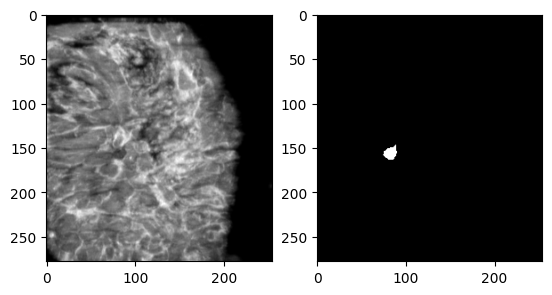

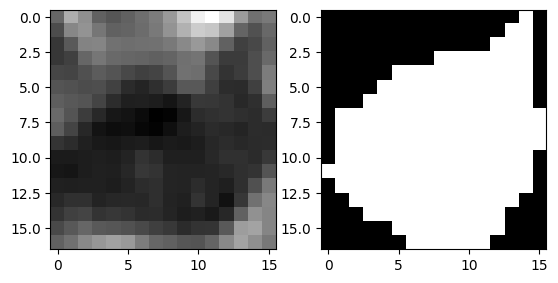

In [4]:
v,m,l = abus[0]
x,y,w,h,d = bbxs[0][15]
sample, sample_mask = v[x:x+w,y:y+h,d], m[x:x+w,y:y+h,d]
sample_full, sample_mask_full = v[:,:,d], m[:,:,d]


plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample_full, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(sample_mask_full, cmap="gray")
plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.imshow(sample, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(sample_mask, cmap="gray")
plt.show()

In [7]:
max_depth = 40
signature_data = []
for index, bbx_list in enumerate(bbxs):
    signatures = np.zeros([max_depth,360], dtype=np.float32)
    _, m, l = abus[index]
    for i, bbx in enumerate(bbx_list):
        x,y,w,h,d = bbx
        mask = m[x:x+w,y:y+h,d]
        if mask.sum() > 10:
            signatures[i,:] = signature(mask, res=1)
    signature_data.append((signatures,l))

/home/ozma/Source/abus-classification/utils/image.py:72: RuntimeWarning: divide by zero encountered in scalar floor_divide
  return x_cords.sum()//len(x_cords), y_cords.sum()//len(y_cords)


40


In [10]:
with open(f"./data/abus/signature.pkl", 'wb') as file:
    pickle.dump(signature_data, file)

In [12]:
print(len(signature_data))
x,y = signature_data[0]
print(x.shape)

60
(40, 360)
